# Тематическое моделирование

**Тематическое моделирование** — технология статистического анализа текстов для автоматического выявления тематики в больших коллекциях документов

**Тематическая модель** (англ. topic model) — модель коллекции текстовых документов, которая определяет, к каким темам относится каждый документ и какие слова (термины, термы) образуют каждую тему. Для этого не требуется никакой ручной разметки текстов, обучение модели происходит без учителя.

Чем-то похоже на кластеризацию, но тематическое моделирование в этом плане является «мягким» и допускает, чтобы документ относился к нескольким кластерам-темам. Тематическое моделирование не претендует на понимание смысла текста, однако оно способно отвечать на вопросы «о чём этот текст» или «какие общие темы имеет эта пара текстов».

Тематическая модель формирует сжатое векторное представление текста, которое помогает классифицировать, рубрицировать, аннотировать, сегментировать тексты. В отличие от известных векторных представлений семейства x2vec (word2vec, paragraph2vec, graph2vec и т.д.), в тематических векторах каждая координата соответствует теме и имеет содержательную интерпретацию. Модель привязывает к каждой теме список ключевых слов или фраз, который описывает семантику этой темы. 

Тему нельзя строго определить ни семантически, ни эпистемологически. Темы выявляются исключительно с помощью автоматического подсчета правдоподобия совестной встречаемости слов. Слово может быть отнесено к нескольким темам, но с разной вероятностью, но слова-соседи для каждой темы у него будут разными. Высокочастотные служебные слова будут иметь примерно одинаковую вероятность для всех тем.


### Зачем это нужно?

* разведочный информационный поиск (exploratory search) в электронных библиотеках;
* поиск по смыслу, а не по ключевым словам;
* обнаружение и отслеживание событий в новостных потоках;
* выявление тематических сообществ в социальных сетях;
* построение профилей интересов пользователей в рекомендательных системах;
* категоризация интентов в системах разговорного интеллекта;
* поиск мотивов в нуклеотидных и аминокислотных последовательностях;
* аннотирование изображений;
* поиск аномального поведения объектов в видеопотоке;
* выявление паттернов поведения клиетов по транзакционным данным. 

### Построение тематической модели документа 

* $p(w|t)$ — матрица искомых условных распределений слов по темам 
* $p(t|d)$— матрица искомых условных распределений тем по документам
* $d$ — документ
* $w$ — слово
* $d, w$ — наблюдаемые переменные 
* $t$ — тема (скрытая переменная)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.png/1280px-%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.png' width='600' align='left'>


### Виды тематических моделей

* LSA (LSI)
* pLSA (pLSI)
* LDA
* ARTM
* ...

### Подробнее о тематических моделях

* [Кратко, но с формулами](http://www.machinelearning.ru/wiki/index.php?title=%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)
* [Подробный обзор тематических моделей от К.В. Воронцова](http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf)

## LSA (LSI)

**Латентно-семантический анализ**, **LSA** *(latent semantic analysis)*, он же **LSI** *(latent semantic indexing)* — самая ранняя модель, предложенная еще в конце 80-х гг. Модель называется латентной, т.к. предполагает введение скрытого (латентного) параметра — темы.

Ниже — анимация процесса обнаружения тематик в матрице «терм-документ». Каждый столбец матрицы соответствует документу, каждая строка — слову. Ячейки матрицы содержат веса слов в документах (например, значения TF-IDF), более тёмные оттенки соответствуют более высокому весу. Алгоритм LSA группирует как документы, которые используют похожие слова, так и слова, которые встречаются в похожем наборе документов. Полученные кластеры в матрице используются для обнаружения латентных (скрытых) компонентов в исходных данных, соответствующих определённым тематикам.

![](img/lsa.gif)

Наиболее распространенный вариант LSA основан на использовании сингулярного разложения матрицы. С помощью SVD-разложения любая матрица раскладывается во множество ортогональных матриц, линейная комбинация которых является достаточно точным приближением к исходной матрице. Этим и объясняется название этого алгоритма в `sklearn` — `TruncaredSVD`.

Вспомним формулу сингулярного разложения: 

$A = U\Sigma V^{T}$

Особенность такого разложения в том, что если в матрице $\Sigma$ оставить только $k$ наибольших сингулярных значений, а в матрицах $U$ и $V$ — только соответствующие этим значениям столбцы, то произведение получившихся матриц $\Sigma$, $U$ и $V$ будет наилучшим приближением исходной матрицы $A$ к матрице $\hat{A}$ ранга $k$.

$\hat{A}\approx A = U\Sigma V^{T}$

Основная идея LSA в том, что если в качестве матрицы $A$ использовать матрицу «терм-документ», то матрица  $\hat{A}$ отражает основную структуру различных зависимостей, присутствующих в исходной матрице. Эту структуру определяют веса термов. Таким образом, каждый терм и документ представляются при помощи векторов в общем пространстве размерности $k$ (т.н. пространстве гипотез). Близость между любой комбинацией термов и/или документов легко вычисляется при помощи скалярного произведения векторов.

[Подробнее об алгоритме](https://en.wikipedia.org/wiki/Latent_semantic_analysis) (по-английски).


## pLSA (pLSI)

**pLSA** *(probabilistic latent semantic analysis)*, она же **pLSI** *(probabilistic latent semantic indexing)* — вероятностный латентно-семантический анализ (индексирование). Модель предложена в 1999 г. Томасом Хоффманом, [вот оригинальная статья](https://web.archive.org/web/20101214074049/http://www.cs.brown.edu/~th/papers/Hofmann-SIGIR99.pdf). 

Зачем понадобилось модифицировать LSA? Проблема этого метода в том, что он предполагает, что слова и документы имеют нормальное распределение, но в реальности это не так. Поэтому на практике чаще используется pLSA, основанный на мультиномиальном распределении. Если LSA — это чистая линейная алгебра, то pLSA имеет еще и статистические основания.

Согласно pLSA, совместная встречаемость терма и документа $(w, d)$ моделируется как сочетание независимых мультиномиальных распределений, где $c$ — тема. Количество тем — это гиперпараметр, который выбирается до начала анализа. 

$$ P(w, d)=\sum_{c} P(c) P(d | c) P(w | c)=P(d) \sum_{c} P(c | d) P(w | c)$$

Ниже — схема алгоритма в т.н. *plate notation*. Прямоугольники на схеме — повторяющиеся элементы, внешний прямоугольник — документы, внутренний — позиции повторяющихся слов в данном документе. Т.е. такая схема показывает один документ, но справедлива для каждого.

<img src="img/plsi.png" width="400" align="left" style="padding-right: 50px; ">


* $d$ — индекс документа
* $c$ — тема, к которой принадлежит слово, полученная из распределения тем по документам $P(c|d)$
* $w$ — слово, полученное из распределения слов по теме, к которой оно принадлежит $P(w|c)$
* $d$ и $w$ — наблюдаемые переменные
* $c$ — скрытая переменная.


[Подробнее о алгоритме](http://www.machinelearning.ru/wiki/index.php?title=%D0%92%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%BD%D1%8B%D0%B9_%D0%BB%D0%B0%D1%82%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%B5%D0%BC%D0%B0%D0%BD%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7) (осторожно, много формул!)



## LDA

**LDA** *(Latent Dirichlet Allocation)*, латентное размещение Дирихле — генеративная вероятностная модель корпуса текстов. Самая распространенная модель, разработана в 2002-2003 гг. ([вот оригинальная статья](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf) David Blei, Andrew Ng, Michael I. Jordan). Это следующий шаг в развитии тематических моделей, где устранены недостатки pLSA (легко переобучается; при добавлении документа в коллекцию надо все пересчитывать заново). *Сейчас эта тематическая модель используется шире всего.*

В LDA каждый документ может рассматриваться как набор случайных скрытых тем, где каждая тема определяется распределением слов, при этом каждое слово в конкретном документе можно отнести к одной из его тем. Подобный подход схож с pLSA с той разницей, что в LDA качестве априорного распределения для тем используется распределение Дирихле. Это улучшает качество получающихся тем. 

![](img/LDA.png)

* $M$ — количество документов
* $N$ — количество слов в документе
* $\alpha$ — параметр априорного распределения Дирихле на подокументном распределении тем
* $\beta$ — параметр априорного распределения Дирихле на потемном распределении слов 
* $\theta _{i}$  — распределение тем для документа i
* $\varphi _{k}$ — распределение слов для темы k
* $ z_{ij}$  — тема, к которой принадлежит j-тое слово в документе i
* $w_{ij}$ — конкретное слово

<br>

То, что $W$ закрашено серым, означает, что единственные наблюдаемые переменные — $w_{ij}$ и $z_{ij}$ , а остальные являются скрытыми.

Подробнее о алгоритме [здесь](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

## BigARTM

*ARTM — Additive Regularization for Topic Modeling*

**BigARTM** — библиотека с открытым кодом для тематического моделирования больших коллекций текстовых документов и массивов транзакционных данных. Эффективная потоковая параллельная реализация вероятностного тематического моделирования на основе аддитивной регуляризации.

> Аддитивная регуляризация (ARTM) позволяет задать сразу несколько критериев-регуляризаторов. Например, чтобы построить тематическую модель новостного потока, необходимо учесть несколько верхних уровней уже имеющегося рубрикатора, научить модель учитывать время документов, разделять темы на подтемы и создавать новые темы по необходимости. ARTM позволяет складывать регуляризаторы от разных моделей, создавая комбинации моделей с заданными свойствами под конкретные приложения. Это приводит к модульной технологии тематического моделирования с высокой степенью повторного использования кода.

Зачем нужно что-то еще, если есть LDA? Проблема в том, что задача тематического моделирования имеет очень много (бесконечно много) решений, и LDA выбирает одно из них, не предоставляя никаких средств для выбора лучшего решения под конкретную задачу. 

![](img/artm.jpg)

BigARTM реализует несколько механизмов, которые снимают многие ограничения простых моделей типа PLSA или LDA и расширяют спектр приложений тематического моделирования.

* Regularization. Регуляризаторы, которые можно комбинировать в любых сочетаниях.
* Modality. Модальности, которыми можно описывать нетекстовые объекты внутри документов.
* Hierarchy. Тематические иерархии, в которых темы разделяются на подтемы.
* Intratext. Обработка текста как последовательности тематических векторов слов.
* Co-occurrence. Использование данных о совместной встречаемости слов.
* Hypergraph. Тематизация сложно структурированных транзакционных данных. 

#### Подробнее

* [Кратко и понятно](http://www.machinelearning.ru/wiki/index.php?title=BigARTM), цитата была отсюда
* [Сайт проекта BigARTM](http://bigartm.org/)
* [Документация BigARTM](http://docs.bigartm.org/en/stable/index.html)
* [Репозиторий](https://github.com/bigartm/bigartm)
* [Тьюториалы от авторов библиотеки](https://github.com/bigartm/bigartm-book)
* [В обзоре Воронцова](http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf) тоже об этом немало, стр. 55-65


# Практическая часть

In [1]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn.feature_extraction.text import *
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import Normalizer, LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Данные

В качестве примера возьмем статьи из газеты «Полярный круг» (г. Салехард, Якутия) за 2014-2017 гг. Каждая статья — отдельный документ. Тексты заранее лемматизированы, осталось убрать из них пунктуацию и стоп-слова. Затем представим наш корпус в виде массива документов, где каждый документ, в свою очередь, будет массивом токенов.

In [5]:
with open('rus_stopwords.txt', 'r', encoding='utf-8') as f:
    sw = f.read().split('\n')
    
sw[40:50]

['ведь',
 'весь',
 'весьма',
 'видеть',
 'видит',
 'вместе',
 'во',
 'восемь',
 'вот',
 'впрочем']

In [56]:
with open('polkrug_lem.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
texts = text.split('\n\n')

punct = '[!"#$%&()*+,./:;<=>?@[\]^_`{|}~„“«»†*/\—–‘’]'
nums = '[0-9]'

texts = [re.sub('\n', ' ', text) for text in texts]
texts = [re.sub(punct, '', text) for text in texts]
texts = [re.sub(nums, '', text) for text in texts]

tokenized_texts = []
for text in texts:
    text = [w for w in text.split() if w not in sw]
    tokenized_texts.append(text)
    
tokenized_texts[0][:10]

<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: Dep

['лев',
 'толстой',
 'анна',
 'каренина',
 'писать',
 'счастливый',
 'семья',
 'похожий',
 'друг',
 'друг']

In [8]:
len(tokenized_texts)

3607

### Векторизуем документы

Векторизуем тексты с помощью `doc2vec` (подробнее см. в [тетрадке про эмбеддинги](https://github.com/ancatmara/data-science-nlp/blob/master/2.%20Embeddings.ipynb)). Они будут представлены словарем и корпусом.

In [9]:
from gensim.models import *
from gensim import corpora
from gensim import similarities

In [11]:
# почему бы не doc2vec?

print('Making dictionary...')
dictionary = corpora.Dictionary(tokenized_texts)
print('Original: {}'.format(dictionary))
dictionary.filter_extremes(no_below = 5, no_above = 0.9, keep_n=None)
dictionary.save('polkrug.dict')
print('Filtered: {}'.format(dictionary))

print('Vectorizing corpus...')
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
corpora.MmCorpus.serialize('polkrug.model', corpus) 

Making dictionary...
Original: Dictionary(43034 unique tokens: ['10', '1964', 'август', 'адрес', 'анна']...)
Filtered: Dictionary(12866 unique tokens: ['10', '1964', 'август', 'адрес', 'анна']...)
Vectorizing corpus...


### Определение близости документов

Распределение тем можно использовать для определения близости документов. В нашем случае картинка будет плохо читаема, если мы возьмем все документы, т.к. их в нашем корпусе больше 3000. Поэтому для построения графика выберем 30 случайных.

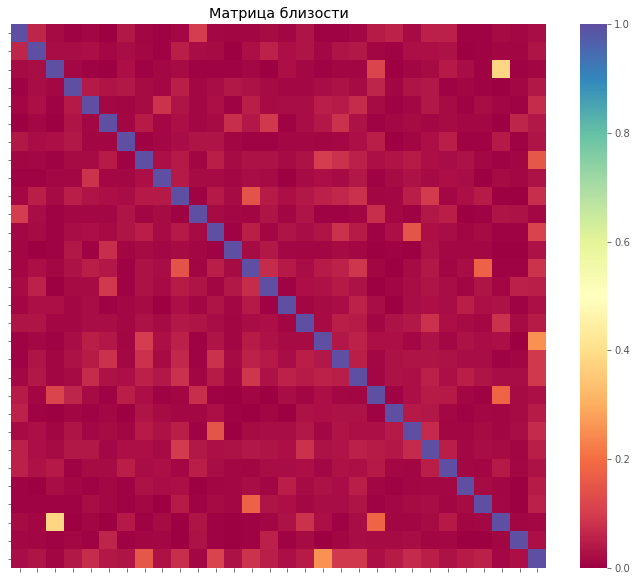

In [12]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

# tf-idf векторах
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# создание случайной выборки
sampling_tfidf = random.choices(corpus_tfidf, k=30)

# вычисление сходства по косинусной мере на tf-idf векторах
index = similarities.MatrixSimilarity(sampling_tfidf)
sims = index[sampling_tfidf]

plt.figure(figsize = (12,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

## LSI (LSA)

Данная модель реализована в библиотеке `gensim`.

In [13]:
lsi = lsimodel.LsiModel(corpus, id2word=dictionary, num_topics=20, chunksize=50)

In [14]:
lsi.show_topics(num_topics=5, num_words=10, formatted=False) # можно показать не все темы, а только часть

[(0,
  [('год', 0.3768526149603475),
   ('город', 0.23365046220761754),
   ('салехард', 0.21555489917502385),
   ('работа', 0.17158479684939015),
   ('день', 0.14835110883068856),
   ('человек', 0.14298072611275445),
   ('россия', 0.12248783757212399),
   ('ребенок', 0.12091673090479448),
   ('городской', 0.10904850693247395),
   ('округ', 0.10412368839396724)]),
 (1,
  [('год', -0.37072604401513104),
   ('война', -0.19431535190557875),
   ('салехард', 0.1700102442178666),
   ('город', 0.15275502194199225),
   ('сторона', 0.1362104318388347),
   ('полиция', 0.1274464481455509),
   ('победа', -0.12661435463463055),
   ('работа', 0.11123239848303788),
   ('великий', -0.10784913271890931),
   ('май', -0.10224170897891405)]),
 (2,
  [('война', -0.19738780953476404),
   ('победа', -0.15693034762901314),
   ('социальный', -0.1534234607579632),
   ('россия', 0.14143704261763798),
   ('июнь', 0.1387765596829548),
   ('улица', 0.1357567207808142),
   ('библиотека', 0.1289752922795271),
   ('год

Посмотрим, как снижение размерности влияет на матрицу близости. 

**NB!** Это не те же самые тексты, что на предыдущей картинке, просто другие случайные 30.

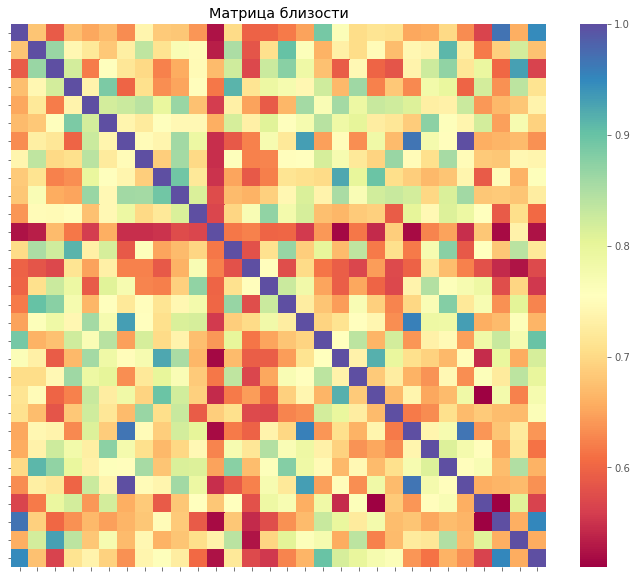

In [15]:
sampling = random.choices(corpus, k=30)

sampling_lsi = lsi[sampling]
index = similarities.MatrixSimilarity(lsi[sampling])
sims = index[sampling_lsi]
sims  = (sims + 1)/2.

plt.figure(figsize = (12,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

## LDA

Данная модель также реализована в библиотеке `gensim`. Один из ее плюсов в том, что можно дообучать готовую модель (а отличие от LSA и pLSA, где даже при добавлении одного нового документа приходится обучать модель с нуля).

In [16]:
print("Training model...")

%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

Training model...
CPU times: user 7.74 s, sys: 90.4 ms, total: 7.83 s
Wall time: 8.35 s


In [17]:
lda.show_topics(num_topics=5, num_words=10, formatted=False)

[(3,
  [('округ', 0.025581632),
   ('россия', 0.023993846),
   ('ямал', 0.021535212),
   ('регион', 0.020353556),
   ('проект', 0.015985118),
   ('развитие', 0.012388475),
   ('государственный', 0.0107086925),
   ('янао', 0.0101412125),
   ('дмитрий', 0.009942483),
   ('губернатор', 0.009849162)]),
 (18,
  [('год', 0.051226072),
   ('русский', 0.024258526),
   ('обдорск', 0.019169401),
   ('церковь', 0.015199798),
   ('сибирский', 0.012914839),
   ('александр', 0.011921329),
   ('петр', 0.011688814),
   ('дом', 0.010960174),
   ('тобольский', 0.010317127),
   ('первый', 0.010047224)]),
 (16,
  [('год', 0.03537993),
   ('социальный', 0.01723414),
   ('документ', 0.016318081),
   ('комиссия', 0.015199146),
   ('салехард', 0.013132229),
   ('гражданин', 0.012298282),
   ('округ', 0.010761523),
   ('государственный', 0.010603314),
   ('автономный', 0.010072725),
   ('право', 0.009464077)]),
 (4,
  [('человек', 0.017591799),
   ('время', 0.0107708555),
   ('друг', 0.009950371),
   ('рассказ

### LDAVis

LDAVis выдает интерактвную визуализацию тем и слов, которые их определяют. Это выглядит вот так:

![](./img/ldavis.png)

In [18]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

CPU times: user 1.8 s, sys: 109 ms, total: 1.91 s
Wall time: 4.73 s


[Вот тут](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#13.-t-SNE-Clustering-Chart) можно почитать про разные способы визуализации для тематического моделирования и посмотреть примеры кода.

## t-SNE

**t-SNE**  (*t-distributed Stochastic Neighbor Embedding*) — техника нелинейного снижения размерности и визуализации многомерных переменных. Она разработана специально для данных высокой размерности Л. ван дер Маатеном и Д. Хинтоном, [вот их статья](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). t-SNE — это итеративный алгоритм, основанный на вычислении попарных расстояний между всеми объектами (в том числе поэтому он довольно медленный).

### Способ №1: применяем t-SNE к исходным данным 

In [41]:
%time model = word2vec.Word2Vec(tokenized_texts, workers=4, size=300, min_count=10, window=10, sample=1e-3)

CPU times: user 15.7 s, sys: 794 ms, total: 16.5 s
Wall time: 6.27 s


In [43]:
print(len(model.wv.vocab))

9202


In [44]:
from nltk import FreqDist
from tqdm import tqdm_notebook as tqdm
from sklearn.manifold import TSNE

top_words = []


fd = FreqDist()
for s in tqdm(tokenized_texts):
    fd.update(s)

for w in fd.most_common(1000):
    top_words.append(w[0])
    
print(top_words[:50:])
top_words_vec = model[top_words]

HBox(children=(IntProgress(value=0, max=3607), HTML(value='')))


['год', 'город', 'салехард', 'человек', 'работа', 'день', 'комментарий', 'ребенок', 'ямал', 'становиться', 'округ', 'первый', 'время', 'россия', 'новый', 'место', 'проходить', 'жизнь', 'городской', 'администрация', 'отмечать', 'каждый', 'школа', 'дом', 'проект', 'организация', 'получать', 'вопрос', 'самый', 'центр', 'семья', 'работать', 'участник', 'гражданин', 'война', 'окружной', 'глава', 'принимать', 'регион', 'социальный', 'территория', 'проводить', 'слово', 'житель', 'большой', 'дело', 'салехардский', 'детский', 'образование', 'развитие']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [46]:
from sklearn.manifold import TSNE

In [47]:
%%time
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

CPU times: user 18.7 s, sys: 1.3 s, total: 20 s
Wall time: 20.4 s


In [48]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE (eng model, top1000 words)")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

### Способ №2: cперва снизим размерность чем-то более быстрым, например, PCA или SVD

In [49]:
from sklearn.decomposition import TruncatedSVD

svd_50 = TruncatedSVD(n_components=50)
top_words_vec_50 = svd_50.fit_transform(top_words_vec)
top_words_tsne2 = TSNE(n_components=2, random_state=0).fit_transform(top_words_vec_50)

In [50]:
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE (eng model, top1000 words, +SVD)")

source = ColumnDataSource(data=dict(x1=top_words_tsne2[:,0],
                                    x2=top_words_tsne2[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

### Что еще посмотреть?

Также можно извлечь ключевые слова для каждой темы и добавить их на график. [Вот хороший тьюториал](https://shuaiw.github.io/2016/12/22/topic-modeling-and-tsne-visualzation.html) о том, как это сделать. 


## Извлечение ключевых слов

Ключевые слова и словосочетания сложно определить формально. Поскольку определений ключевых слов и словосочетаний множество, существует масса методов их извлечения:
* с учителем VS без учителя
* частотные VS по-сложнее
* из одного текста VS из коллекции текстов
* слова (униграммы) VS биграммы VS $N$-граммы
* термины VS именованные сущности VS коллокации
* последовательные слова VS с использованием окна

### Основные этапы извлечения ключевых слов и словосочетаний:
1. Порождение кандидатов
2. Оценка свойств кандидатов
3. Выбор лучших кандидатов

### Основные этапы извлечения ключевых слов и словосочетаний:
* Морфологические шаблоны
* Меры ассоциации биграмм: PMI, T-Score, LLR
* Графовые методы: TextRank [Mihalcea, Tarau, 2004]
* Мера контрасности: tf-idf


### Использование мер связности 


$w_1, w_2$ -- два слова

$f(w_1), f(w_2)$ -- их частоты

$f(w_1, w_2)$ -- совместная частота биграммы $w_1 w_2$

$N$ -- число слов

$PMI(w_1, w_2) = \log \frac{f(w_1, w_2)}{f(w_1)f(w_2)}$

$T-score(w_1, w_2) = \frac{f(w_1,w_2)-f(w_1)*f(w_2)}{f(w_1,w_2)/N}$

Другие меры связности: $\chi^2$, $\texttt{log likelihood}$

In [57]:
import nltk
from nltk.collocations import *
N_best = 100 # число извлекаемых биграм


texts = [t for sublist in tokenized_texts for t in sublist]
bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(texts) # класс для хранения и извлечения биграм
finder.apply_freq_filter(1) # избавимся от биграм, которые встречаются реже трех раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

In [58]:
rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

,raw_freq,pmi,t-score,chi2,llr
0,автономный округ,A-Dessa Disco-party,автономный округ,A-Dessa Disco-party,автономный округ
1,глава администрация,AndroidSmsBot AndroidBodkel,глава администрация,AndroidSmsBot AndroidBodkel,иван кононенко
2,администрация город,Animals STUDIO,администрация город,Animals STUDIO,глава администрация
3,иван кононенко,Apple Watch,иван кононенко,Apple Watch,великий отечественный
4,ямало-ненецкий автономный,Asia Pacific,ямало-ненецкий автономный,Arctic Awards,ямало-ненецкий автономный
5,окружной столица,Award азиатско-тихоатлантический,окружной столица,Art family,российский федерация
6,великий отечественный,BMX street,великий отечественный,Asia Pacific,детский сад
7,детский сад,BRUNETKI DJ,детский сад,Award азиатско-тихоатлантический,дмитрий кобылкин
8,российский федерация,BURGER PLACE,российский федерация,BMX street,администрация город
9,принимать участие,Bad Balance,принимать участие,BRUNETKI DJ,окружной столица


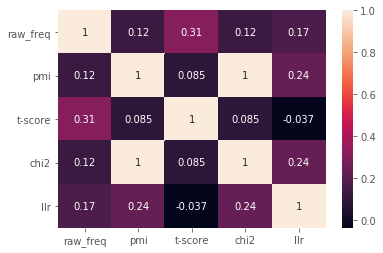

In [59]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline
corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))

## Задание

Мы будем работать с (частичными) данными lenta.ru отсюда: https://www.kaggle.com/yutkin/corpus-of-russian-news-articles-from-lenta/

- Сравните разные алгоритмы тематического моделирования. Визуализируйте результаты, раскрасьте проекции (по любым атрибутам), добавьте на график метки документов и/или топ-3 слов для каждой из получившихся тем. Хорошо ли интерпретируются полученные темы? Если нет, то почему? Что сделать, чтобы это улучшить?
- Попробуйте выделить ключевые слова из текстов (text) и проверьте, входят ли они в заголовки (title).

In [60]:
! wget -O lenta-ru-news-part.csv https://www.dropbox.com/s/ja23c9l1ppo9ix7/lenta-ru-news-part.csv?dl=0

--2019-09-08 20:24:16--  https://www.dropbox.com/s/ja23c9l1ppo9ix7/lenta-ru-news-part.csv?dl=0
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/ja23c9l1ppo9ix7/lenta-ru-news-part.csv [переход]
--2019-09-08 20:24:17--  https://www.dropbox.com/s/raw/ja23c9l1ppo9ix7/lenta-ru-news-part.csv
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://uca5447773f3801318d3f3c5c412.dl.dropboxusercontent.com/cd/0/inline/AoJeKtXPRNXKkr-znWkwQzg-PpcEThXEZXA9cP2auiIUMsh2yLc5BNn5PbiEa5igaPl3NlcetHD6Ht3HYMvqxtLBTg38Ejc0fdRB5uIX4rloal3ChDiq8OVpc3ELduYca5I/file# [переход]
--2019-09-08 20:24:17--  https://uca5447773f3801318d3f3c5c412.dl.dropboxusercontent.com/cd/0/inline/AoJeKtXPRNXKkr-znWkwQzg-PpcEThXEZXA9cP2auiIUMsh2yLc5BNn5PbiEa5igaPl3NlcetHD6Ht3HYMvqxtLBTg38Ej

In [61]:
lenta = pd.read_csv('lenta-ru-news-part.csv', usecols=['title', 'text', 'topic'])
lenta.head()

,title,text,topic
0,Австрия не представила доказательств вины росс...,Австрийские правоохранительные органы не предс...,Спорт
1,Овечкин повторил свой рекорд,Капитан «Вашингтона» Александр Овечкин сделал...,Спорт
2,Названы регионы России с самым дорогим и дешев...,Производитель онлайн-касс «Эвотор» проанализир...,Экономика
3,Россию и Украину пригласили на переговоры по газу,Вице-президент Еврокомиссии Марош Шефчович при...,Экономика
4,Хоккеист НХЛ забросил шайбу с отрицательного угла,Нападающий клуба «Эдмонтон Ойлерс» Коннор Макд...,Спорт
